# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [28]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [29]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., .001, 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

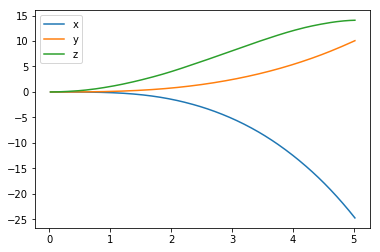

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

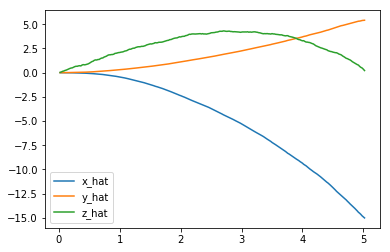

In [31]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

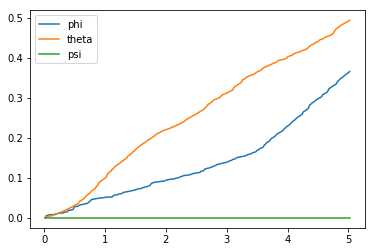

In [32]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

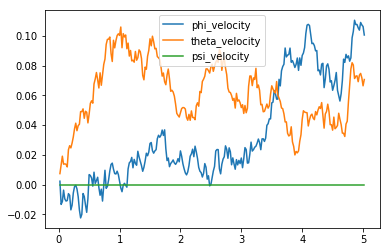

In [33]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

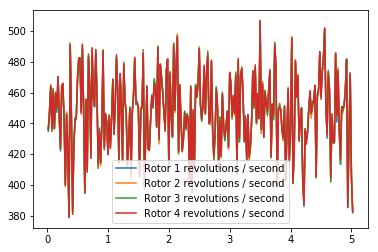

In [34]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [35]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-24.71343116  10.06415691  14.07547817   0.36548384   0.49320025   0.        ]
[-15.01667007   5.41919505   0.21771114]
[ 0.10074252  0.0707558   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [36]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)

agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()


Episode = 1000, score =  -0.030 (best =  -0.003), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

<IPython.core.display.Javascript object>


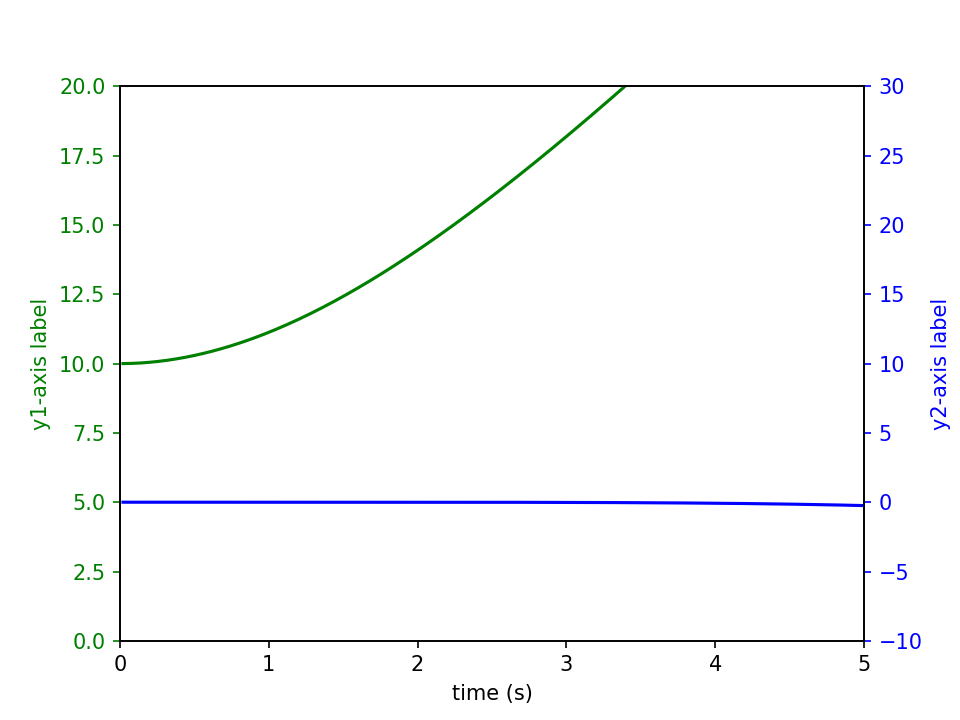

<IPython.core.display.Javascript object>


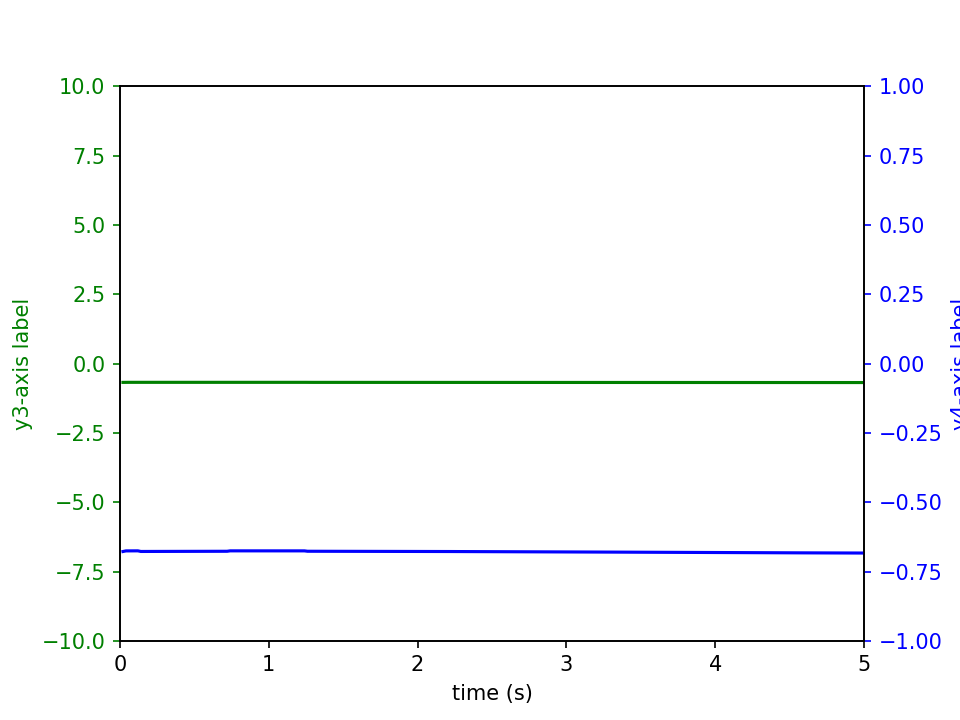

<IPython.core.display.Javascript object>


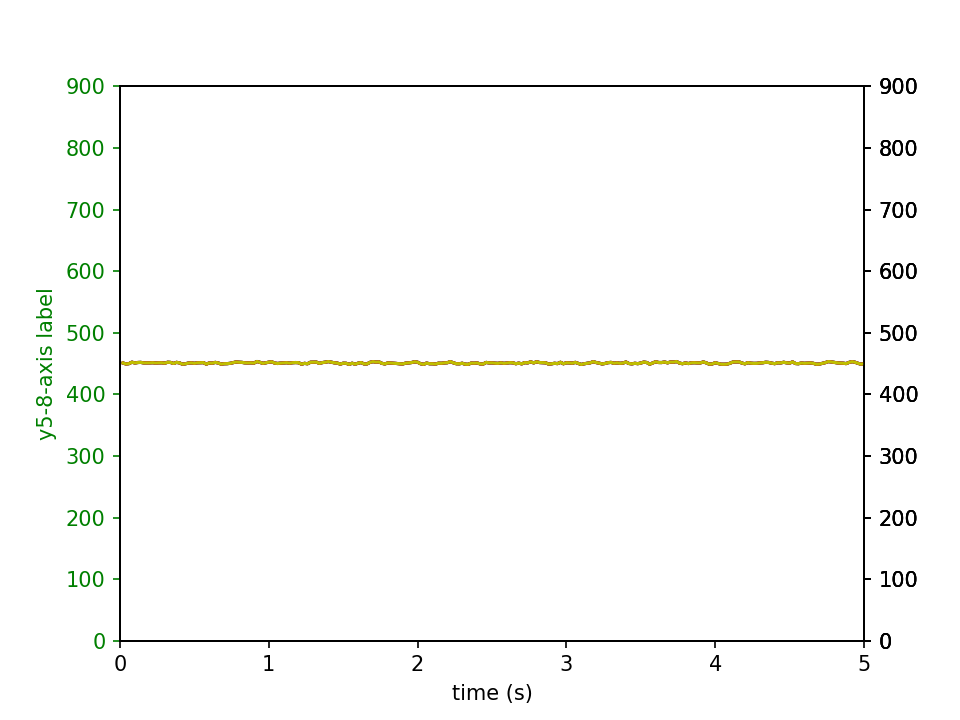

<IPython.core.display.Javascript object>


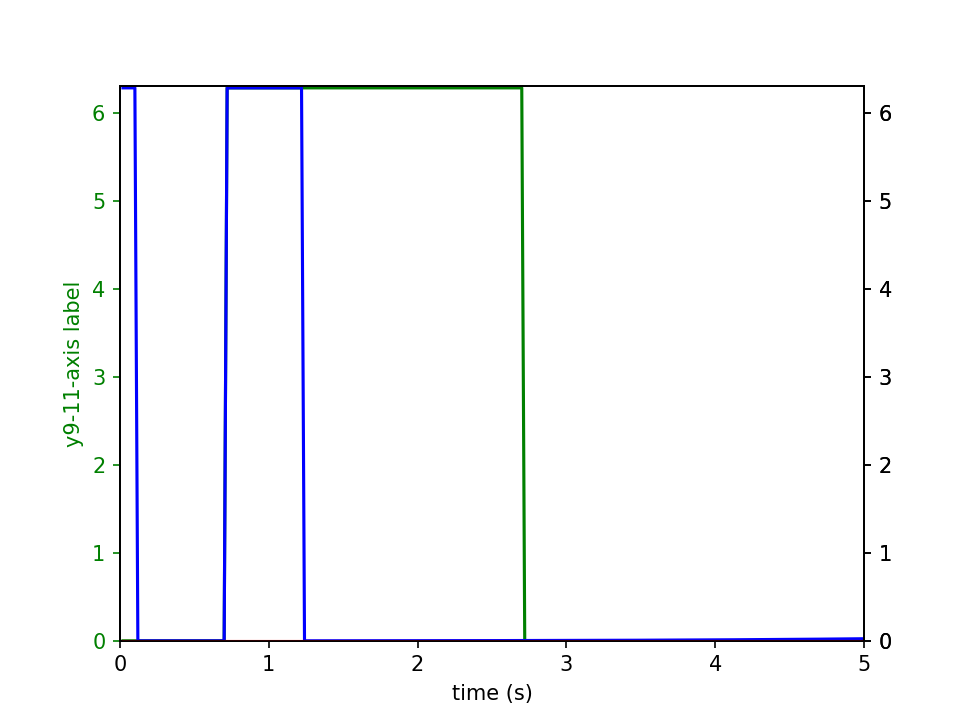

In [2]:
# source: Sander Bogdan (slack)

# NOTE: this cell sometimes needs to be run more than once before the initial figures are displayed

import matplotlib.pyplot as plt

time_limit= 5.
y1_lower=   0.
y1_upper=  20.
y2_lower=  -10
y2_upper = +30
y3_lower=   -10. 
y3_upper =  +10.
y4_lower=   -1.
y4_upper =  +1.
y5_lower = 0.
y5_upper = 900.
y9_lower = 0.
y9_upper = 6.3
y10_lower = 0.
y10_upper = 6.3
y11_lower = 0.
y11_upper = 6.3



# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

# generate plot function
def plt_dynamic1(x, y1, y2, color_y1='g', color_y2='b'):
    sub1.plot(x, y1, color_y1)
    sub2.plot(x, y2, color_y2)
    fig1.canvas.draw()

# create plots
fig1, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()


# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2


# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')


def plt_dynamic2(x, y1, y2, color_y1='g', color_y2='b'):
    sub3.plot(x, y1, color_y1)
    sub4.plot(x, y2, color_y2)
    fig2.canvas.draw()

# create plots
fig2, sub3= plt.subplots(1,1)
sub4 = sub3.twinx()


# set plot boundaries
sub3.set_xlim(0, time_limit) # this is typically time
sub3.set_ylim(y3_lower, y3_upper) # limits to your y1
sub4.set_xlim(0, time_limit) # time, again
sub4.set_ylim(y4_lower, y4_upper) # limits to your y2


# set labels and colors for the axes
sub3.set_xlabel('time (s)', color='k') 
sub3.set_ylabel('y3-axis label', color='g')
sub3.tick_params(axis='x', colors='k')
sub3.tick_params(axis='y', colors="g")

sub4.set_ylabel('y4-axis label', color='b') 
sub4.tick_params(axis='y', colors='b')


def plt_dynamic3(x, y5, y6, y7,y8, color_y5='g', color_y6='b', color_y7='r',color_y8='y'):
    sub5.plot(x, y5, color_y5)
    sub6.plot(x, y6, color_y6)
    sub7.plot(x, y7, color_y7)
    sub8.plot(x, y8, color_y8)
    fig3.canvas.draw()

# create plots
fig3, sub5= plt.subplots(1,1)
sub6 = sub5.twinx()
sub7 = sub5.twinx()
sub8 = sub5.twinx()


# set plot boundaries
sub5.set_xlim(0, time_limit) # this is typically time
sub5.set_ylim(y5_lower, y5_upper) # limits to your y5
sub6.set_xlim(0, time_limit) # this is typically time
sub6.set_ylim(y5_lower, y5_upper) # limits to your y5
sub7.set_xlim(0, time_limit) # this is typically time
sub7.set_ylim(y5_lower, y5_upper) # limits to your y5
sub8.set_xlim(0, time_limit) # this is typically time
sub8.set_ylim(y5_lower, y5_upper) # limits to your y5



# set labels and colors for the axes
sub5.set_xlabel('time (s)', color='k') 
sub5.set_ylabel('y5-8-axis label', color='g')
sub5.tick_params(axis='x', colors='k')
sub5.tick_params(axis='y', colors="g")



def plt_dynamic4(x, y9, y10,y11, color_y9='g', color_y10='b', color_y11='r'):
    sub9.plot(x, y9, color_y9)
    sub10.plot(x, y10, color_y10)
    sub11.plot(x, y11, color_y11)

    fig4.canvas.draw()

# create plots
fig4, sub9= plt.subplots(1,1)
sub10 = sub9.twinx()
sub11 = sub9.twinx()



# set plot boundaries
sub9.set_xlim(0, time_limit) # this is typically time
sub9.set_ylim(y9_lower, y9_upper) # limits to your y5
sub10.set_xlim(0, time_limit) # this is typically time
sub10.set_ylim(y10_lower, y10_upper) # limits to your y5
sub11.set_xlim(0, time_limit) # this is typically time
sub11.set_ylim(y11_lower, y11_upper) # limits to your y5




# set labels and colors for the axes
sub9.set_xlabel('time (s)', color='k') 
sub9.set_ylabel('y9-11-axis label', color='g')
sub9.tick_params(axis='x', colors='k')
sub9.tick_params(axis='y', colors="g")




Start of training

In [ ]:
## TODO: Train your agent here.

%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from task import Task
import csv

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'Q_target', 'reward']
results = {x : [] for x in labels}

num_episodes = 1000

# general configuration
display_graph = True
display_freq = 100
write_csv_freq= 50

target_pos = np.array([10., 0., 10.])
init_pose= np.array([0.,0.,10.,0.,0.,0.])
init_velocities=np.array([0.,0.,0.])
init_angle_velocities=np.array([0.,0.,0.])
runtime=5.
task = Task(target_pos=target_pos,init_pose=init_pose,init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities, runtime=runtime)
agent = DDPG(task) 




for i_episode in range(0, num_episodes+1):
    
    # prior to the start of each episode, clear the datapoints
    x, y1, y2, y3, y4,y5,y6,y7,y8,y9,y10,y11= [], [], [], [], [], [], [], [], [], [], [], []
    rotorspeed = [0.]*4
    
    file_output = 'data/data' + str(i_episode) + '.txt'      # file name for saved results
    results = {x : [] for x in labels}
    
    state = agent.reset_episode() # start a new episode

    i=0
    
    


    with open(file_output, 'w') as csvfile:
        if (i_episode % write_csv_freq) == 0:
            writer = csv.writer(csvfile)
            writer.writerow(labels)
   

        
        while True:
            
            i+=1          
            action, Q_value = agent.act(state) 
            
            
            for rotor in range(0,4):
                rotorspeed[rotor] = action[rotor]+action[4]
            
            
            #constrainn action: all rotors_speeds the same
            #action=np.ones(4)*np.average(action)
            next_state, reward, done = task.step(rotorspeed) 
#        if i<2:
#            print(action, done, next_state)
            agent.step(action, reward, next_state, done)
            state = next_state
        
            
        
            if i_episode % write_csv_freq == 0:
                to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotorspeed) + list(Q_value) + [reward]
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
        
 #       print("pos z = {:7.3f}, vel z = {:7.3f}, ang 3 = {:7.3f}, vla 3 = {:7.3f}".format(agent.last_state[2],agent.last_state[8],agent.last_state[5],agent.last_state[11]))
        # within the episode loop
            if (i_episode % display_freq == 0) and (display_graph == True):
                x.append(task.sim.time) # time
                y1.append(task.sim.pose[2]) # y-axis 1 values
                y2.append(task.sim.pose[0])           # y-axis 2 values
                y3.append(Q_value) # y-axis 3 values
                y4.append(Q_value) # y-axis 4 values
                y5.append(rotorspeed[0])
                y6.append(rotorspeed[1])
                y7.append(rotorspeed[2])
                y8.append(rotorspeed[3])
                y9.append(task.sim.pose[3])
                y10.append(task.sim.pose[4])
                y11.append(task.sim.pose[5])

        
            if done:
                #print("\rEpisode = {:4d}, Av Reward ={:7.3f}, Time till done ={:6.2f}".format(i_episode, agent.score, task.sim.time))
                print("\rEpisode = {:4d}, Tot Reward ={:10.6f}, Av Reward ={:10.6f}, Time till done ={:6.2f}".format(i_episode, agent.total_reward, agent.score, task.sim.time))
            #print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
            #    i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
                if (i_episode % display_freq == 0) and (display_graph == True):
                    plt_dynamic1(x, y1, y2)
                    plt_dynamic2(x, y3, y4)
                    plt_dynamic3(x, y5,y6,y7,y8)
                    plt_dynamic4(x,y9,y10,y11)
                break
        sys.stdout.flush()

Using TensorFlow backend.


Episode =    0, Tot Reward = -0.003407, Av Reward = -0.000014, Time till done =  5.02
Episode =    1, Tot Reward = -0.003410, Av Reward = -0.000014, Time till done =  5.02
Episode =    2, Tot Reward = -0.003393, Av Reward = -0.000014, Time till done =  5.02
Episode =    3, Tot Reward = -0.003410, Av Reward = -0.000014, Time till done =  5.02
Episode =    4, Tot Reward = -0.003433, Av Reward = -0.000014, Time till done =  5.02
Episode =    5, Tot Reward = -0.003418, Av Reward = -0.000014, Time till done =  5.02
Episode =    6, Tot Reward = -0.003428, Av Reward = -0.000014, Time till done =  5.02
Episode =    7, Tot Reward = -0.003425, Av Reward = -0.000014, Time till done =  5.02
Episode =    8, Tot Reward = -0.003410, Av Reward = -0.000014, Time till done =  5.02
Episode =    9, Tot Reward = -0.003427, Av Reward = -0.000014, Time till done =  5.02
Episode =   10, Tot Reward = -0.003463, Av Reward = -0.000014, Time till done =  5.02
Episode =   11, Tot Reward = -0.003433, Av Reward = -0

In [ ]:
import pandas as pd

show_episode= i_episode # i_episode should be last episode
print(show_episode)
filename= 'data/data'+ str(show_episode) + '.txt'
results= pd.read_csv(filename)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['Q_target'], label='Q_target')

plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['reward'], label='reward')

plt.legend()
_ = plt.ylim()

In [ ]:
# actor param changes (theta) are proportial to dQ/da * da/dtheta
# dQ/da is action_gradient
# da/dtheta is actor gradient
# if the changes are in te wrong direction, then either dQ/da or da/dtheta is in wrong direction.
#
# 1) check action_gradients
# in subsequent steps, sometimes tha actions move in the opposite direction of what the action_gradient tells.
# idea: after a couple of episodes, calculate 
#    - the action_gradients for a specific action
#    - and the Q value around that action, and see if it is consistent and sensible
# consistent: yes, variation of Q is according to the gradient 
# sensible: ?
#
pose= np.array([0.,0., 5.,1.0,0.,0.])
v=np.array([0.,0,0.])
angular_v=np.array([0.0,0.,0.])
state = np.concatenate(([pose]+[v]+[angular_v]) * 1)
state = np.reshape(state, [-1, 12])
print("state:", state)
action_a = agent.actor_local.model.predict(state)
action = agent.actor_local.model.predict(state)[0]
print ("action: ", action)
Q_value = agent.critic_target.model.predict([state, action_a])[0]
print("Q_value: ", Q_value)
action_gradients = np.reshape(agent.critic_target.get_action_gradients([state, action_a, 0]), (-1, 5))
print("action_gradients: ", action_gradients)
eps = 0.01
delta_b = np.array([0.0,0.0,0.,0.])
for i in range(0,4):
    delta = np.copy(delta_b)
    delta[i]=eps
    new_action = action + delta
    print ("new_action: ", new_action)
    new_action_a = new_action.reshape(-1,5)
    new_Q_value = agent.critic_target.model.predict([state, new_action_a])[0]
    print("new_Q_value: ", new_Q_value)
    dQda = (new_Q_value - Q_value)/eps
    print("dQda : ", dQda)

delta = np.array([0.0,0.02,0.02,-0.02])
new_action = action + delta
print ("new_action: ", new_action)
new_action_a = new_action.reshape(-1,5)
new_Q_value = agent.critic_target.model.predict([state, new_action_a])[0]
print("new_Q_value: ", new_Q_value)

 

In [ ]:
from keras import backend as K
from keras import layers
input_ph = K.placeholder(shape=(4,))
#input_ph
states = layers.Input(shape=(12,), name='states')
states
raw_actions = layers.Dense(units=4, activation='sigmoid',name='raw_actions')(states)
raw_actions
actions = layers.Lambda(lambda x: (x * 900) + 10,            name='actions')(raw_actions)
actions
action_gradients = layers.Input(shape=(4,))
action_gradients
K.mean(action_gradients*actions)

In [ ]:
sigma = np.array([1.,2.,3.,4.,1000.])
sigma*np.random.randn(5)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.
plt.plot(y2)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 
The task is to take off from the ground to reach a height of 10m at x,y coordinates 0 so I have set the target_pos to 0,0,10. Starting positions is a small amount above 0.

I decided to include velocity and angle velocity in the state, giving it a size of 12 (3 for position, 3 for Euler angles, 3 for velocity, 3 for angle velocity). With velocities in the state, I saw no need for action repeats, so I set action repeat to 1.

I have started with a simple reward function which goes linear with the the distance to the target position 

   distance_to_target = ((vector_to_target **2).sum())**0.5
   reward = 1 -rd *distance_to_target

I tried different values for rd (in the range form 10e-4 to 10e+1, but I had no success at all with that in the beginning.
Then I started to use other measures, first the velocity. I defined

        vel_vector_to_target_inner = np.inner(self.sim.v,vector_to_target)
        vel_vector_to_target_inner_normalized = 0. if abs(vel_vector_to_target_inner)<0.001 else \
            vel_vector_to_target_inner/(LA.norm(self.sim.v)*LA.norm(vector_to_target))

where vel_to_vector_to_targer_inner_normalized is equal 1 if the velocity is exactly in the direction of the target position, and -1 if it is pointing in exactl the opposite direction. 
Reward was then a factor + rv* vel_vector_to_target_inner_normalized. Tried a large range of rv.
But not much succes.

At some point I noticed that the quadcopter was rotating a lot, I observed wildly varying Euler angles, and large angular velocities, higher than 20 radians/s. So I added factors to punish for that. To keep the Euler angles all near 0, I used

        angle_diff = self.sim.pose[3:]-self.target_angle
        angle_diff_plus_2pi = angle_diff + 2 *np.pi
        angle_diff_min_2pi = angle_diff - 2 *np.pi
        angle_diff_min = np.minimum(np.minimum(abs(angle_diff), abs(angle_diff_plus_2pi)), abs(angle_diff_min_2pi))
        angle_measure = angle_diff_min.sum()

whith reward -ra*angle_measure. The plus and min 2pi components are to take into account for the fact that he angles are defined mod 2pi. Tried a large range of ra.

I also tried to keep the angle velocities small. I think that that is better then keeping the Euler angles themselves near zero, since small angle velocities keep the quadcopter stable, but allow for tilting to move in a different direction. So I defined 

      angular_v_measure = ((self.sim.angular_v**2).sum())**0.5

and reward factor -rav * angular_v_measure. Later I changed it to angular_v_measure = (self.sim.angular_v**2).sum() in order to punish relatively more for larger angular velocities.

Here I noticed that I really could not keep the angular velocities small, no matter how small or how large the punishment for large angular velocities was. I let the quadcopter start at a large height, giving it substantial time before falling down on the ground. Observing the rotor speeds, They always drifted towards either the maximum or the minimum rotor speed. And sure if one of the four is at minimum and the other three at maximum, the thing will rotate fast :( 

At some point I added a tanh around my reward in order to always get rewards between -1 and 1. 

To make some progress, I removed the angle problem for the time being. I put a constraint to the rotor speeds, so that they are equal to each other. The idea was that with a starting position with all Euler angles equal to zero, with equal rotor speeds the quadcopter can only move up and down, basically limiting the state space to the z-axis, and no rotations.
I constrained the rotor speeds simply by defining 

	action=np.ones(4)*np.average(action)

immediately after the action selection action = agent.act(state).
With that setup, the agent was able to learn quite easily just based on the reward function tanh(-rd *distance_to_target), with rd=0.003 but other values in the same order of magnitude also worked fine. 

So at least I could see the agent was able to learn at all!

I then removed the constraint again, but made sure that the rotors would at least start with almost equal speeds by initializing the actor with tiny weights. This ensured that the initial rotor speeds would all be in the middle of the action range. There I noticed the following. With basically equal initial rotor speeds of about 450, the quadcopter actually takes off in the very first episode. But due to noise and, later, weight updates, the rotor speeds started to diverge a bit. Then the quadcopter just could not take off again. I played around a lot with reward and hyperparameters, but the agent was just not able to learn to keep the rotor speeds almost equal.

I noticed that just a little difference in rotor speeds was sufficient to let the quadcopter fall down. In one of my runs I set both the action_low and action_high to 700, so basically constraining all rotors to that speed, only allowing noise. Without noise, it takes off, as expected. But with a little bit of noise, soon the rotors have little bit different speeds, (range 699-701) and the quadcopter falls down. I do not understand this behaviour. Either I do not understand something in the physics here, or there is a problem somewhere in the code.

In my submitted files, the reward just contains the distance_to_target contribution.
  

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 
I used the DDPG algoithm as described in the paper CONTINUOUS CONTROL WITH DEEP REINFORCEMENT
LEARNING, and I started with the provided sample code for actor, critic, agent and noise.

The agent contains an actor which selects actions based on the state, and a critic which provide a state-action value.
A target actor and critic was added to have a more independent Q targets.

Noise, from an Ornstein_Uhlenbeck process, was added to the actions selected by the actor to provide some exploration.
I played around a lot with sigma, from 0.2 up to 10. In the submitted code I set it back to 0.2, to show that even a small noise leads to the rotor speed divergence effect.

At each step, the experience (reward given for the selected action in the current state) was stored in a replay buffer. The actor and the critic were updated according to earlier experiences, i.e. samples from the replay buffer.

The actor consists of a network of three dense hidden layers, followed by an dense output layer. Compared to the provided sample code, the most substantial changes I made were: 
- added batch normalization
- initialized tiny weights (kernel_initializer=initializers.random_uniform(minval=-.0003,maxval=0.0003) to the output layer to ensure that the initial output is more or less in the middle of the action range 
- set learning rate to 0.0001, as suggested in the paper.

I did not change the size/number of the layers as provided in the sample code. The network was sufficient to learn in the case of constrained rotor speeds. In the case of unconstrained rotor speeds, first the problem of the angular velocities need to be solved before it makes sense to change the network.

The critic contains two hidden dense layers for the state pathway, and two for the action pathway, which are then combined and followed by a single output dense layer. Main changes compared to the sample code:
- added batch normalization
- small initial weights in the output layer
- added L2 regularization as suggested by the paper.

At each step the target actor and critic networks were updated in the direction of the adjusted local actor and critic networks, but with just a small amount tau = .001 (target_new = (1-tau)*target_old + tau*local).


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: This is a very hard task to learn. In the end, I have only managed to let the agent learn his task in the case of constrained rotor speeds (equal rotor speeds). In the submitted code, the speeds are not constrained, and the agent is just not able to learn at all. 


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: Getting started with the project was a bit hard. No idea what to idea in the beginning. I have read the DDPG paper a few times, and revisited all the videos in the reinforcement learning class. After that it was quite straightforward to combine the pieces of sample code together, and adjusting it to my needs. 

In the beginning I struggled with NaN numbers showing up in my states, but after visiting the forums and slack, it became clear there was a bug in the reset function the PhysicsSim class. After fixing that bug the NaNs did not show up anymore.

It was very helpful to plot the actions, states and rewards. That was quite easy using the code provided in the notebook and what other people provided in the slack channel.

The most difficult part was to find out the root cause of the problem that the agent was not learning. I have narrowed the problem down, I think, to the problem that just slightly different rotor speeds are leading to a state where the quadcopter jsut falls down, but I do not underdstand this behavior.

But while debugging, I think I learned a lot actually. Reading and rereading the paper and other material, watching and rewatching the videos, etc., really increased my knowledge. Playing around with all the hyperparameters really gives additional insights that you cannot gain from just reading stuff. I believe, that I am just a few steps away from getting the agent to learn. I did not solve the problem, but I submit my project now, hoping to get some valuable feedback :)